In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
%store -r df

In [3]:
df

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,year_of_registration,gearbox,power_ps,model,kilometer,month_of_registration,fuel_type,brand,not_repaired_damage,date_created,postal_code,last_seen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,limousine,1993.0,manually,0,golf,150000,0,gasoline,volkswagen,no,2016-03-24,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011.0,manually,190,golf,125000,5,diesel,audi,yes,2016-03-24,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004.0,automatic,163,grand,125000,8,diesel,jeep,no,2016-03-14,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001.0,manually,75,golf,150000,6,gasoline,volkswagen,no,2016-03-17,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008.0,manually,69,fabia,90000,7,diesel,skoda,no,2016-03-31,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,limousine,2005.0,manually,0,golf,20000,1,gasoline,sonstige_autos,no,2016-03-14,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000.0,automatic,101,fortwo,125000,3,gasoline,smart,no,2016-03-05,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996.0,manually,102,transporter,150000,3,diesel,volkswagen,no,2016-03-19,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002.0,manually,100,golf,150000,6,diesel,volkswagen,no,2016-03-20,40764,2016-03-24 12:45:21


#  No of Vehicles by Brand Available on ebay for sale with the help of visualization


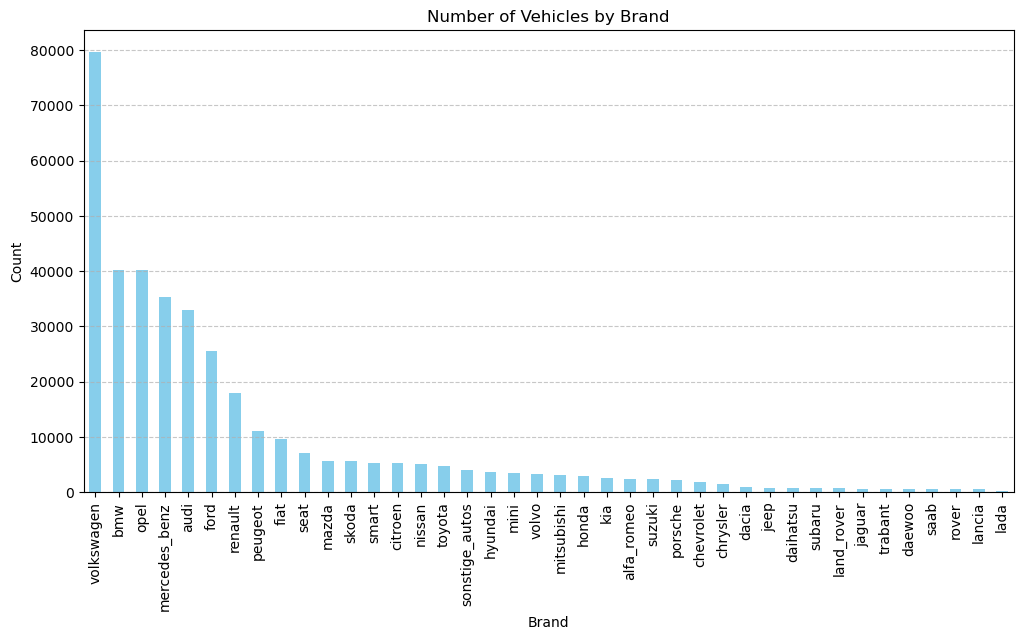

In [7]:
brand_counts = df['brand'].value_counts().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
brand_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Vehicles by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=90)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# What is the Average price for vehicles based on the type of vehicle as well as on the type of gearbox.Explain me with both numerical and visualization analysis


# Numerical Analysis

In [8]:
average_price = df.groupby(['vehicle_type', 'gearbox'])['price'].mean()
average_price = average_price.reset_index()
print(average_price)

   vehicle_type    gearbox          price
0        andere  automatic    7366.861496
1        andere   manually  758055.365154
2           bus  automatic   10599.265713
3           bus   manually   10244.418314
4        cabrio  automatic   16254.374208
5        cabrio   manually   14674.193796
6         coupe  automatic   35500.199567
7         coupe   manually   21561.150169
8    kleinwagen  automatic    3889.552200
9    kleinwagen   manually    5842.936603
10        kombi  automatic    8910.045892
11        kombi   manually    7323.746801
12    limousine  automatic   17375.917378
13    limousine   manually   12641.186224
14          suv  automatic   16764.091774
15          suv   manually    9913.012436


# Visualization Analysis

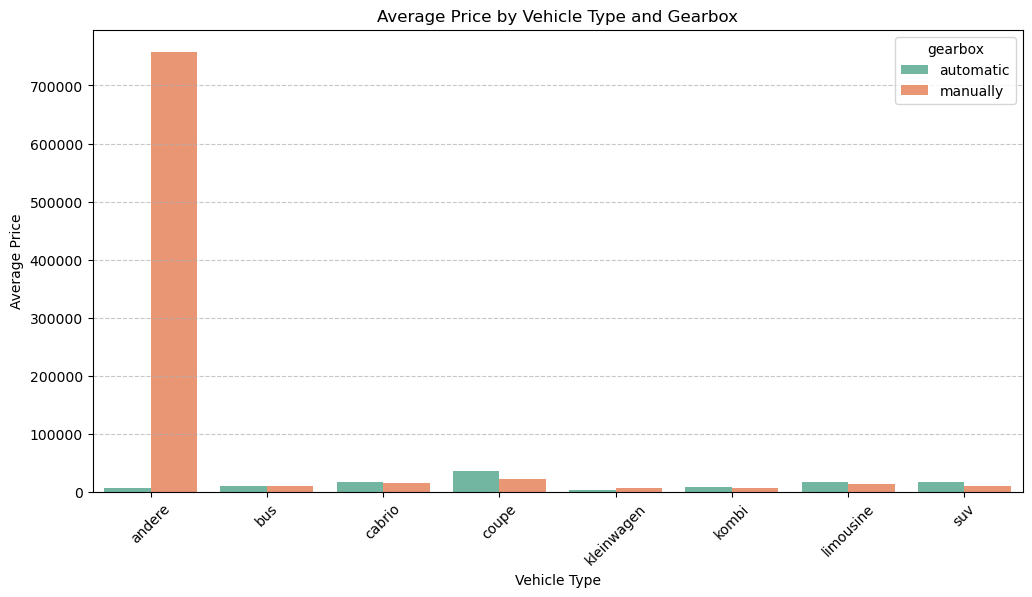

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(x='vehicle_type', y='price', hue='gearbox', data=average_price, palette='Set2')
plt.title('Average Price by Vehicle Type and Gearbox')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# What is the marginal probability of private seller


In [10]:
total_entries = len(df)

private_seller_count = (df['seller'] == 'privat').sum()


marginal_probability = private_seller_count / total_entries

print(f"The marginal probability of private seller is: {marginal_probability:.2f}")

The marginal probability of private seller is: 1.00
